In [ ]:
#

# COMPRIMO IL VETTORE DI METILAZIONE

In [1]:
import pandas as pd 
import numpy as np

df0 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_0.h5', key='1234', mode='r')
df0 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_0.h5', key='1234', mode='r')
df0 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_0.h5', key='1234', mode='r')
df1 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_1.h5', key='1234', mode='r')
df2 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_2.h5', key='1234', mode='r')
df3 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_3.h5', key='1234', mode='r')
df4 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_4.h5', key='1234', mode='r')
df5 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_5.h5', key='1234', mode='r')
df6 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_6.h5', key='1234', mode='r')
df7 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_7.h5', key='1234', mode='r')
df8 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_8.h5', key='1234', mode='r')
df9 = pd.read_hdf('../dataset/Dataset/alberto_seq_array_9.h5', key='1234', mode='r')

dataset = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7, df8, df9])
dataset


,gene_id,gene_type,split,labels,gene_name,TSS,chromosome_name,strand,fpkm_median,tpm_median,fpkm_uq_median,Seq,array
0,ENSG00000198691,protein_coding,test,-1.201834,ABCA4,94121177,chr1,-,-1.112163,0.309409,-0.892446,"[1, 3, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 3, 3, ...","(0, 90854)\t0.01985548622906208"
1,ENSG00000135776,protein_coding,train,0.573164,ABCB10,229558730,chr1,-,2.044114,3.543001,2.229126,"[0, 2, 0, 2, 2, 0, 2, 3, 2, 2, 3, 0, 0, 2, 0, ...","(0, 76414)\t0.17362597584724426"
2,ENSG00000143322,protein_coding,train,0.488895,ABL2,179143084,chr1,-,0.688583,2.139535,0.873813,"[3, 2, 3, 2, 1, 1, 0, 0, 3, 2, 0, 2, 1, 3, 2, ...","(0, 120866)\t0.024935100227594376\n (0, 122..."
3,ENSG00000131584,protein_coding,train,0.798138,ACAP3,1307938,chr1,-,1.848998,3.319618,1.992406,"[1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 2, 1, 3, ...","(0, 42837)\t0.016621699556708336\n (0, 9995..."
4,ENSG00000182827,protein_coding,valid,1.077838,ACBD3,226186763,chr1,-,4.172536,5.655054,4.329461,"[1, 2, 0, 3, 1, 3, 1, 0, 2, 1, 3, 1, 0, 1, 3, ...","(0, 8334)\t0.6710221171379089\n (0, 129134)..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18013,ENSG00000235961,protein_coding,train,-0.499574,PNMA6A,152240819,chrX,+,0.470094,1.984990,0.647637,"[3, 0, 3, 2, 1, 1, 0, 3, 1, 1, 0, 1, 1, 0, 0, ...","(0, 48807)\t0.6558285355567932"
18014,ENSG00000236362,protein_coding,train,-1.463212,GAGE12F,49325479,chrX,+,-7.643856,-7.643856,-7.643856,"[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...",
18015,ENSG00000237671,protein_coding,train,-1.463212,GAGE12C,49296814,chrX,+,-7.643856,-7.643856,-7.643856,"[1, 2, 0, 1, 1, 1, 0, 2, 1, 0, 3, 3, 0, 3, 0, ...",
18016,ENSG00000243978,protein_coding,train,-1.148857,RTL9,109662285,chrX,+,-5.078259,-3.721658,-4.891108,"[0, 3, 1, 3, 1, 0, 0, 2, 0, 3, 0, 3, 3, 3, 1, ...","(0, 65113)\t0.1490333527326584"


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(dataset[dataset['split']=='train'][['fpkm_uq_median']])
dataset['fpkm_uq_median'] = scaler.transform(dataset[['fpkm_uq_median']])

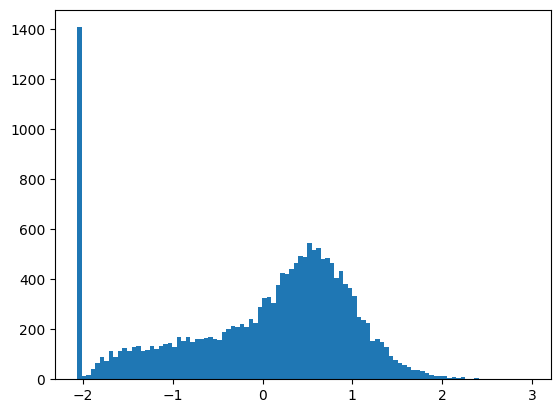

In [3]:
#stampa disribuzione dei valori di fpkm_uq_median
import matplotlib.pyplot as plt
plt.hist(dataset['fpkm_uq_median'], bins=100)
plt.show()


In [10]:
def sparse_to_array(a):
    return a.toarray().flatten()

# Applica la funzione sparse_to_array a tutte le matrici sparse nella colonna 'array'
dataset['array'] = [sparse_to_array(mat) for mat in dataset['array']]

test  = dataset[dataset['chromosome_name']=='chr8']
val   = dataset[dataset['chromosome_name']=='chr10']
train = dataset[(dataset['chromosome_name']!='chr8') & (dataset['chromosome_name']!='chr10')]


print(f"Dimensioni dataset di test:`{test.shape}`")
print(f"Dimensioni dataset di validazione:`{val.shape}`")
print(f"Dimensioni dataset di train:`{train.shape}`")

X_trainpromoter = np.array(list(train['Seq']))
y_train = train['fpkm_uq_median'].values

X_validationpromoter = np.array(list(val['Seq']))
y_validation = val['fpkm_uq_median'].values

X_testpromoter = np.array(list(test['Seq']))
y_test = test['fpkm_uq_median'].values


X_met_train = np.array(list(train['array']))
X_met_val = np.array(list(val['array']))
X_met_test = np.array(list(test['array']))

Dimensioni dataset di test:`(618, 13)`
Dimensioni dataset di validazione:`(683, 13)`
Dimensioni dataset di train:`(16717, 13)`


In [11]:
print(np.unique(X_trainpromoter))

[0 1 2 3 4]


In [2]:
import numpy as np
from scipy import sparse

def desparse(a):
    return sparse.csr_array(a)

#applica sulla colonna array la funzione desparse
df['Metilazione_compressed'] = df['array'].apply(desparse)

In [4]:
import pandas as pd
from scipy.sparse import coo_matrix

def check_equality(original_column, compressed_column, column_index):
    # Converte la colonna compressa in un array NumPy
    compressed_array = compressed_column.toarray()

    # Verifica l'uguaglianza degli array
    if not (original_column == compressed_array).all():
        return column_index


# Controlla l'uguaglianza per ogni riga
indices_non_uguali = []
for index, row in df.iterrows():
    original_column = row['array']
    compressed_column = row['Metilazione_compressed']
    non_uguali = check_equality(original_column, compressed_column, index)
    if non_uguali is not None:
        indices_non_uguali.append(non_uguali)

# Stampa gli indici delle colonne non uguali
if indices_non_uguali:
    print("Indici delle righe non uguali:")
    print(indices_non_uguali)
else:
    print("Tutte le righe sono uguali.")

Indici delle colonne non uguali:
[53, 58, 74, 82, 88, 94, 110, 116, 135, 139, 170, 233, 234, 246, 286, 293, 327, 336, 350, 357, 360, 374, 375, 419, 421, 443, 446, 456, 485, 515, 521, 577, 578, 579, 596, 624, 630, 647, 648, 649, 650, 651, 718, 719, 748, 764, 780, 787, 802, 851, 861, 873, 880, 909, 920, 938, 947, 948, 949, 953, 954, 967, 969, 970, 992, 995, 996, 997, 1002, 1039, 1079, 1093, 1097, 1129, 1154, 1160, 1176, 1178, 1181, 1190, 1213, 1228, 1247, 1267, 1270, 1271, 1291, 1297, 1298, 1299, 1300, 1301, 1305, 1308, 1338, 1345, 1346, 1349, 1351, 1353, 1355, 1363, 1366, 1369, 1412, 1424, 1427, 1429, 1447, 1462, 1463, 1464, 1507, 1521, 1537, 1549, 1586, 1598, 1599, 1600, 1601, 1602, 1620, 1622, 1623, 1631, 1637, 1649, 1659, 1660, 1663, 1683, 1689, 1702, 1725, 1737, 1743, 1752, 1753, 1763, 1774, 1782, 1806, 1816, 1821, 1840, 1867, 1872, 1878, 1890, 1895, 1900, 1902, 1906, 1910, 1912, 1935, 1993, 2015, 2048, 2052, 2062, 2073, 2139, 2182, 2217, 2227, 2288, 2291, 2333, 2344, 2379, 2388, 24

In [4]:
import torch



# Supponendo che metsum e pooled_output siano i tuoi tensori
metsum = torch.randn(32)
pooled_output = torch.randn(32, 1, 128)

# Aggiungi una dimensione al tensore metsum per renderlo compatibile con pooled_output
metsum_expanded = metsum.unsqueeze(1).unsqueeze(-1)
print(metsum_expanded.shape)  # Stampa la forma del tensore espanso
print(pooled_output.shape)  # Stampa la forma di pooled_output
# Concatena i due tensori lungo l'ultima dimensione
concatenated_tensor = torch.cat((pooled_output, metsum_expanded), dim=-1)

print(concatenated_tensor.shape)  # Stampa la forma del tensore concatenato

torch.Size([32, 1, 1])
torch.Size([32, 1, 128])
torch.Size([32, 1, 129])


In [2]:

lunghezza_dataset = len(dataset)
# Calcola il numero di esempi per 'train', 'val' e 'test' rispettivamente
num_train = int(lunghezza_dataset * 0.85)
num_val = int(lunghezza_dataset * 0.1)
num_test = lunghezza_dataset - num_train - num_val
# Crea un array che rappresenta la suddivisione in 'train', 'val' e 'test'
suddivisione = ['train'] * num_train + ['val'] * num_val + ['test'] * num_test
# Permischi l'array per garantire che le istanze siano distribuite casualmente
np.random.shuffle(suddivisione)
# Aggiungi la colonna 'split' al DataFrame
dataset['split'] = suddivisione

In [6]:
#salva il dataset dividendolo in 5 parti
dataset = dataset.reset_index(drop=True)
dataset_size = len(dataset)
chunk_size = dataset_size // 5
for i in range(5):
    start = i * chunk_size
    end = (i + 1) * chunk_size
    if i == 4:
        end = dataset_size
    chunk = dataset.iloc[start:end]
    chunk.to_hdf(f'../dataset/Dataset/df_alBERTo_{i}.h5',key='1234', mode='w')



c:\Users\Danilo\anaconda3\envs\AIE\Lib\site-packages\tables\path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '1234'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)
C:\Users\Danilo\AppData\Local\Temp\ipykernel_12784\282318420.py:11: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->Index(['gene_id', 'gene_type', 'split', 'gene_name', 'chromosome_name',
       'strand', 'Seq', 'array'],
      dtype='object')]

  chunk.to_hdf(f'../dataset/Dataset/df_alBERTo_{i}.h5',key='1234', mode='w')


In [17]:
#controlla se la colonna 'StringSeq' è stata creata correttamente confrontandola con la colonna 'Seq'
for index, row in dataset.iterrows():
    if not (row['Seq'] == row['StringSeq'].toarray()).all():
        print(f"Errore alla riga {index}")
        

In [18]:
# elimina la colonna 'Seq' e rinomina la colonna 'StringSeq' in 'Seq'
dataset = dataset.drop(columns=['Seq'])
dataset = dataset.rename(columns={'StringSeq': 'Seq'})

In [20]:
import pandas as pd

# Supponiamo che 'dataset' sia il tuo DataFrame da salvare

#converti array in list
dataset['array'] = [a.toarray().tolist() for a in dataset['array']]

# Definisci il numero di chunk
num_chunks = 4

# Calcola la dimensione del chunk
chunk_size = len(dataset) // num_chunks

# Crea un nuovo file HDF5
with pd.HDFStore('../dataset/Dataset/alberto_seq_array.h5', mode='w') as store:
    # Salva il dataset in chunk
    for i in range(num_chunks):
        start_idx = i * chunk_size
        end_idx = start_idx + chunk_size if i < num_chunks - 1 else None
        chunk = dataset.iloc[start_idx:end_idx]
        
        # Salva il chunk nel file HDF5 come un gruppo
        store.put(f'chunk_{i}', chunk, format='table', data_columns=True)